In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# main dataset
price = pd.read_csv('price.csv')

# feature dataset
income = pd.read_csv('income_clean.csv')

In [43]:
# price

# Dataset Generation

In [52]:
# merge all the features to the price dataset as "df"
df = pd.merge(price, income, on = ['RegionName','State'])

In [7]:
price.count()

RegionID      2821
SizeRank      2821
RegionName    2821
RegionType    2821
StateName     2821
              ... 
2021-05-31    2819
2021-06-30    2820
2021-07-31    2821
2021-08-31    2821
2021-09-30    2821
Length: 270, dtype: int64

In [12]:
df.count() #missing 99 counties' income value

RegionID      2722
SizeRank      2722
RegionName    2722
RegionType    2722
StateName     2722
              ... 
2015          2722
2016          2722
2017          2722
2018          2722
2019          2722
Length: 275, dtype: int64

In [53]:
feature_names = df.columns
for i in range(len(feature_names)):
    print(str(i), "\t", str(feature_names[i]),"\t\t\t", str(type(df.iloc[0,i])))

0 	 RegionID 			 <class 'numpy.int64'>
1 	 SizeRank 			 <class 'numpy.int64'>
2 	 RegionName 			 <class 'str'>
3 	 RegionType 			 <class 'str'>
4 	 StateName 			 <class 'str'>
5 	 State 			 <class 'str'>
6 	 Metro 			 <class 'str'>
7 	 StateCodeFIPS 			 <class 'numpy.int64'>
8 	 MunicipalCodeFIPS 			 <class 'numpy.int64'>
9 	 2000-01-31 			 <class 'numpy.float64'>
10 	 2000-02-29 			 <class 'numpy.float64'>
11 	 2000-03-31 			 <class 'numpy.float64'>
12 	 2000-04-30 			 <class 'numpy.float64'>
13 	 2000-05-31 			 <class 'numpy.float64'>
14 	 2000-06-30 			 <class 'numpy.float64'>
15 	 2000-07-31 			 <class 'numpy.float64'>
16 	 2000-08-31 			 <class 'numpy.float64'>
17 	 2000-09-30 			 <class 'numpy.float64'>
18 	 2000-10-31 			 <class 'numpy.float64'>
19 	 2000-11-30 			 <class 'numpy.float64'>
20 	 2000-12-31 			 <class 'numpy.float64'>
21 	 2001-01-31 			 <class 'numpy.float64'>
22 	 2001-02-28 			 <class 'numpy.float64'>
23 	 2001-03-31 			 <class 'numpy.float64'>
24 	 2001-04-30 	

# Data Visualization

### Monthly average price trend

C:\Users\15519\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


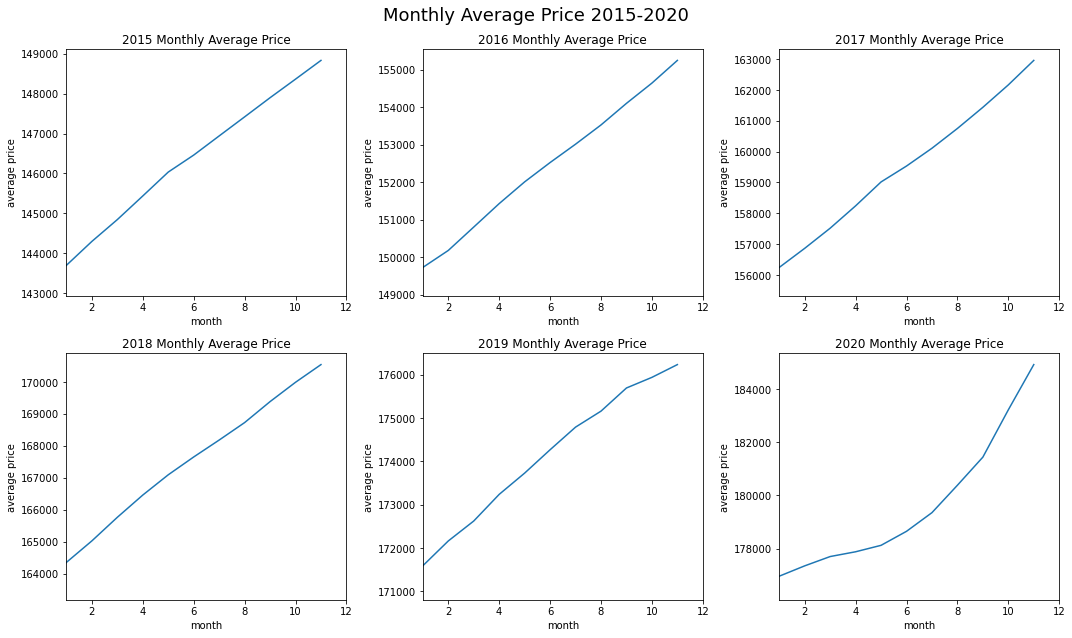

In [42]:
#draw 2015-2019 subplot
ave_price = pd.Series()
for j in [5,6,7,8,9]:
    ave_price['201%d'%j] = df.filter(regex='201%d-'%j)

fig = plt.figure(figsize=(15, 9))
for i in [5,6,7,8,9]:
    plt.subplot(2,3,i-4)
    mean = []
    p = ave_price['201%d'%i]
    for col in p.columns:
        mean.append(p[col].mean())
    plt.plot(mean)
    plt.xlim((1,12))
    plt.xlabel('month')
    plt.ylabel('average price')
    plt.title('201%d Monthly Average Price'%i)

# draw 2020 subplot
plt.subplot(2,3,6)
mean = []
p = df.filter(regex='2020-')
for col in p.columns:
    mean.append(p[col].mean())
plt.plot(mean)
plt.xlim((1,12))
plt.xlabel('month')
plt.ylabel('average price')
plt.title('2020 Monthly Average Price')

plt.suptitle('Monthly Average Price 2015-2020', fontsize=18)
plt.tight_layout()

In [48]:
feature_names

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS', '2000-01-31',
       ...
       '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
       '2015', '2016', '2017', '2018', '2019'],
      dtype='object', length=275)